In [16]:
# Import all the libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Import the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [17]:
# this would not be empty if run in kaggle
initial_path = ''

# Load the train and test datasets from Human Activity Recognition folder
train_csv = pd.read_csv(initial_path + 'Human Action Recognition/Training_set.csv')
test_csv = pd.read_csv(initial_path + 'Human Action Recognition/Testing_set.csv')

trainImage_data = []
testImage_data = []
# print(len(test_csv))
# 
# train_csv = train_csv[:2000]
# test_csv = test_csv[:200]
# Load the images from the train and test datasets
for i in range(len(train_csv)):
    # if(i % 2000 == 0 and i != 0):
    #     break
    trainImage_data.append(img_to_array(
        load_img(initial_path + 'Human Action Recognition/train/'+train_csv['filename'][i], target_size=(150, 150))))

for i in range(len(test_csv)):
    # if(i % 200 == 0 and i != 0):
    #     break
    testImage_data.append(img_to_array(
        load_img(initial_path + 'Human Action Recognition/test/'+test_csv['filename'][i], target_size=(150, 150))))
    
print(len(trainImage_data))
print(len(testImage_data))


12600
5400


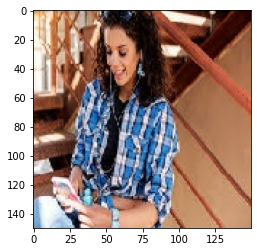

In [18]:
plt.imshow(trainImage_data[0]/255)
plt.show()

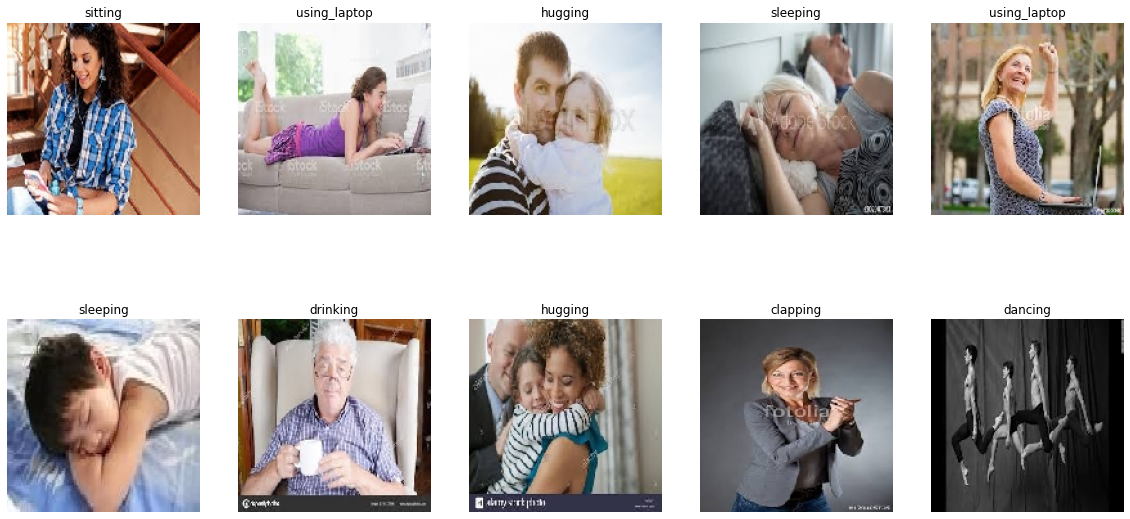

In [19]:
# Display 10 images from the train dataset along with their labels
plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(trainImage_data[i].astype('int32'))
    plt.title(train_csv['label'][i])
    plt.axis('off')
plt.show()

In [20]:
number_to_label_dict = {}
labels = train_csv['label'].unique()

for i in range(len(labels)):
    # if(i % 2000 == 0 and i != 0):
    #     break
    number_to_label_dict[i] = labels[i]

label_to_number_dict = {v:k for k, v in number_to_label_dict.items()}

print(number_to_label_dict)
print(label_to_number_dict)

{0: 'sitting', 1: 'using_laptop', 2: 'hugging', 3: 'sleeping', 4: 'drinking', 5: 'clapping', 6: 'dancing', 7: 'cycling', 8: 'calling', 9: 'laughing', 10: 'eating', 11: 'fighting', 12: 'listening_to_music', 13: 'running', 14: 'texting'}
{'sitting': 0, 'using_laptop': 1, 'hugging': 2, 'sleeping': 3, 'drinking': 4, 'clapping': 5, 'dancing': 6, 'cycling': 7, 'calling': 8, 'laughing': 9, 'eating': 10, 'fighting': 11, 'listening_to_music': 12, 'running': 13, 'texting': 14}


Converting labels to numerical data

In [21]:
# # convert labels in train and test dataset to categorical values
# train_csv['label'] = train_csv['label'].astype('category')
# test_csv['label'] = test_csv['label'].astype('category')
# labels = train_csv['label'].unique()
# print(labels)

# # convert labels in train and test dataset to numerical values manually
# label_dict = {}
# for i in range(len(labels)):
#     label_dict[labels[i]] = i
# print(label_dict)

# train_csv['label'] = train_csv['label'].map(label_dict)
# test_csv['label'] = test_csv['label'].map(label_dict)

# # # convert labels in train and test dataset to numerical values
# # train_csv['label'] = train_csv['label'].cat.codes
# # test_csv['label'] = test_csv['label'].cat.codes

# # # # store mapping 
# # # label_map = dict(zip(train_csv['label'].cat.codes, train_csv['label']))
# # # print(label_map)

# # # convert labels in train and test dataset to categorical values
# # train_csv['label'] = train_csv['label'].astype('category')
# # test_csv['label'] = test_csv['label'].astype('category')
# # get unique labels from train dataset
# labels = train_csv['label'].unique()
# print(labels)
# labels = test_csv['label'].unique()
# print(labels)

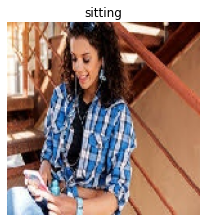

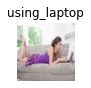

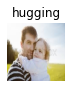

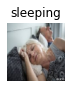

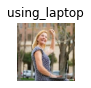

In [22]:

# Plot the first 5 images from the train dataset along with their labels
plt.figure(figsize=(20, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(trainImage_data[i].astype('int32'))
    plt.title(train_csv['label'][i])
    plt.axis('off')
    plt.show()

(10080, 150, 150, 3)
(10080,)


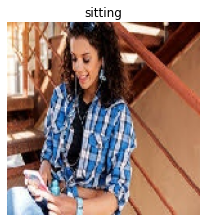

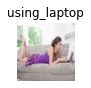

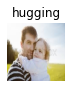

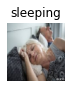

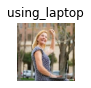

In [23]:
# split the train dataset into train and validation dataset
X = trainImage_data
y = train_csv['label']

x_train = np.array(X[:int(len(X)*0.8)])
y_train = np.array(y[:int(len(y)*0.8)])
x_validation = np.array(X[int(len(X)*0.8):])
y_validation = np.array(y[int(len(y)*0.8):])

# Print the shape of the train and validation dataset
print(x_train.shape)
print(y_train.shape)

# Plot the first 5 images from the train dataset along with their labels
plt.figure(figsize=(20, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i].astype('int32'))
    plt.title(y_train[i])
    plt.axis('off')
    plt.show()

# convert the train and test dataset to numpy array
# x_train = np.array(x_train)
# x_validation = np.array(x_validation)

# # reshape the train and test dataset to 4 dimensions
x_train = x_train.reshape(x_train.shape[0], 150, 150, 3)
x_validation = x_validation.reshape(x_validation.shape[0], 150, 150, 3)

# convert the y_train and y_validation dataset to categorical values

#map the y_train values using the label_to_number dict

y_train = np.array([label_to_number_dict[i] for i in y_train])
y_validation = np.array([label_to_number_dict[i] for i in y_validation])


y_train = to_categorical(y_train, num_classes=15)
y_validation = to_categorical(y_validation, num_classes=15)

In [24]:
# get unique labels bin count from y_train
print(y_train[0])
y_train_labels, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)
print(y_train_labels)
print(counts)

# get unique labels bin count from y_validation
y_validation_labels, counts = np.unique(np.argmax(y_validation, axis=1), return_counts=True)
print(y_validation_labels)
print(counts)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[684 681 683 681 674 667 666 675 665 691 661 659 669 670 654]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[156 159 157 159 166 173 174 165 175 149 179 181 171 170 186]
